In [1]:
import pandas as pd

In [2]:
import os
from os import path 
from time import time
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "TRAS.settings")
import django
from django.core.exceptions import ObjectDoesNotExist
django.setup()
from django.db import transaction
from django.conf import settings

In [3]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

In [4]:
from proto.models import Attraction, Review, Big_Sort

In [5]:
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

In [6]:
def update_address_lati_long():
    
    #geo_df = load_files("")
    
    Attractions = Attraction.objects.all()[:]
    #[Attraction1, Attraction2, ..., Attraction180]
    
    for attraction in Attractions:
        print(str(attraction))
        
    #Attraction.objects.bulk_update(Attractions, [''])

In [8]:
update_address_lati_long()

Gyeongbokgung Palace
Bukhansan National Park
Myeongdong Shopping Street
Changdeokgung Palace
The War Memorial of Korea
National Museum of Korea
Insadong
Trickeye Museum Seoul
Lotte World Tower & Mall
KTX (Korea Train Express)
Seoul Metro
Hangang Park
N Seoul Tower
Namsan Park
Myeongdong NANTA Theater
Cheonggyecheon Stream
Jogyesa Temple
Bongeunsa Temple
Haneul Park
Bukchon Hanok Village
Hongik University Street
Ewha Womans University
Dongdaemun Design Plaza (DDP)
Starfield Library
Kwangjang Market
Love Museum
Seoul Forest
Yeouido Hangang Park
Leeum Samsung Museum of Art
Seoul Sky
Doota
apm Place
Korea University
Bugaksan Seoul Fortress
Korean Postage Stamp Museum
Star Avenue at Lotte World
Migliore Dongdaemun Shop
Lotte Young Plaza Myeongdong
D Museum
Yongsan Family Park
Gilsangsa Shrine
Statue of Gangnam Style
Shinsegae Gangnam
Dongdaemun Gate (Heunginjimun)
I-Park Mall
National Hangeul Museum
Kwanghee Fasion Mall
Tourist Information Center of Korea Tourism Organization
Hongik Univers

In [5]:
sort_path = 'C:/Users/taehee/Documents/GitHub/tripReviewAnalysisSystem/크롤러-전처리/sorting/'

sort_file_list = os.listdir(sort_path)

In [6]:
def add_Attraction_and_Sorting(sort_path, sort_file_name):
    
    attractions_df = pd.read_csv(sort_path+ sort_file_name, engine='python', index_col = 0, encoding = 'utf-8')
        
    for attraction in attractions_df.itertuples(index=False):
        try:
            the_sort = Big_Sort.objects.get(sort_name = attraction[1])
        except Big_Sort.DoesNotExist:
            Big_Sort(sort_name = attraction[1]).save()
            the_sort = Big_Sort.objects.get(sort_name = attraction[1])
        Attraction(name = attraction[0], big_sort = the_sort, address = attraction[3]).save()

In [7]:
def review_date(date_string):
    dict = {
        ' January ':'-01-01',
        ' February ':'-02-01',
        ' March ':'-03-01',
        ' April ':'-04-01',
        ' May ':'-05-01',
        ' June ':'-06-01',
        ' July ':'-07-01',
        ' August ':'-08-01',
        ' September ':'-09-01',
        ' October ':'-10-01',
        ' November ':'-11-01',
        ' December ':'-12-01',
    }
    
    return date_string[-4:] + dict[date_string[:-4]]

In [8]:
print(review_date(' December 2019'))

2019-12-01


In [9]:
def add_Reviews_of_attraction(path, file_name):
    '''
    입력 : 정확한 여행지의 이름(string)
    출력 : 데이터 베이스에 새로운 여행지와 그 리뷰들을 추가
    '''
    
    stime = time()
    print(file_name + ' is began to be moved')
    raw_df = pd.read_csv(path+ file_name, engine='python', index_col = 0, encoding = 'utf-8')    
    
    not_nan_index = raw_df['text'].notna()
    Attraction_df = raw_df[not_nan_index]      
    the_Attraction = Attraction.objects.get(name = file_name[:-4])
    
    '''    
    for review in Attraction_df.itertuples(index=False):
        Review(attraction = the_Attraction, star = review[0],title = review[1], text=review[2], date=review_date(review[3])).save()
    '''
    
    reviews = [Review(attraction = the_Attraction, star = review[0],title = review[1], text=review[2], date=review_date(review[3])) for review in Attraction_df.itertuples(index=False)]
    
    print(reviews[2].text)
    
    Review.objects.bulk_create(reviews)
    
    print(file_name + "has moved to MySQL: 소요시간 [%d]초" % (time() - stime))
        

In [35]:
path = 'C:/Users/taehee/Documents/GitHub/tripReviewAnalysisSystem/크롤러-전처리/원시자료/'

file_list = os.listdir(path)

In [11]:
print(file_list[0])
print(file_list[0][:-4])
test_df = pd.read_csv(path+ file_list[0], engine='python', index_col = 0, encoding = 'utf-8')

63 City.csv
63 City


In [12]:
for test in test_df.head().itertuples(index=False):
    print(test)

Pandas(star_point=3.0, title='nothing special', text='just a tall building in a residential area. not worth visiting in itself. the restaurants and attractions are mostly intended for families in the area.', _3=' February 2020')
Pandas(star_point=4.0, title='City Views', text='Had lunch on 59th floor, outstanding views of the the city. Enjoyable buffet lunch well presented, professional staff.', _3=' October 2019')
Pandas(star_point=3.0, title='Great Views', text='Stopped by here as it was along my travel plans for the day.  The building is striking from the outside and in... a little pricy for the overall experience.  The exterior elevators are quite thrilling for one with a great respect for heights.  It was a bit of a challenge to find the actual entrance to the building/activities and it was quite crowded on the weekend I visited.  As mentioned, it was along the travel route I had planned for the day and thought it would be nice to visit the Art Gallery (happened be to the show "Wi

In [33]:
def update_wordcloud(path):
    #데이터 베이스에서 모든 어트랙션들을 불러온다
    Attractions = Attraction.objects.all()[:]
    
    for attraction in Attractions:
        print(str(attraction))
        try:
            image = Image.open(os.path.join(path, attraction.name+'.csv.jpg'))
            attraction.wordcloud = image
        except:
            continue
            
    Attraction.objects.bulk_update(Attractions, ['wordcloud'])
    #bulk로 업데이트 한다.

In [ ]:
def load_files(path):
    files_address_list = os.listdir(path)
    
    print(files_address_list)
    file_name = files_address_list[0]
    address_df = pd.read_csv(path+file_name, index_col=0, engine='python')
    file_name = files_address_list[-1]    
    latilong_df = pd.read_csv(path+file_name, index_col=0, engine='python')
    
    #주소 폴더에는 주소와 경위도 파일만 있다고 가정하고
    
    for file_name in files_address_list[1:-2]:
        if file_name.startswith("lati_long"):
            new_latilong_df = pd.read_csv(path+file_name, index_col=0, engine='python')
            latilong_df = latilong_df.append(new_df, ignore_index = True)
        else:
            new_address_df = pd.read_csv(path+file_name, index_col=0, engine='python')
            address_df = address_df.append(new_df, ignore_index = True)
        # 180개 여행지를 가진 하나의 데이터 프레임으로 합친다.
    return address_df, latilong_df

In [36]:
image = Image.open(os.path.join(path, 'Gyeongbokgung Palace'+'.csv.jpg'))

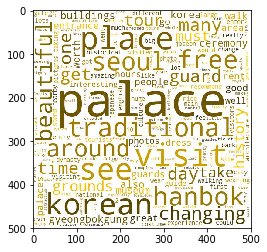

In [38]:
imshow(np.asarray(image))

In [40]:
update_wordcloud("C:/Users/taehee/Documents/GitHub/tripReviewAnalysisSystem/시각화-웹사이트/p1/proto/static/")

Gyeongbokgung Palace
Bukhansan National Park
Myeongdong Shopping Street
Changdeokgung Palace
The War Memorial of Korea
National Museum of Korea
Insadong
Trickeye Museum Seoul
Lotte World Tower & Mall
KTX (Korea Train Express)
Seoul Metro
Hangang Park
N Seoul Tower
Namsan Park
Myeongdong NANTA Theater
Cheonggyecheon Stream
Jogyesa Temple
Bongeunsa Temple
Haneul Park
Bukchon Hanok Village
Hongik University Street
Ewha Womans University
Dongdaemun Design Plaza (DDP)
Starfield Library
Kwangjang Market
Love Museum
Seoul Forest
Yeouido Hangang Park
Leeum Samsung Museum of Art
Seoul Sky
Doota
apm Place
Korea University
Bugaksan Seoul Fortress
Korean Postage Stamp Museum
Star Avenue at Lotte World
Migliore Dongdaemun Shop
Lotte Young Plaza Myeongdong
D Museum
Yongsan Family Park
Gilsangsa Shrine
Statue of Gangnam Style
Shinsegae Gangnam
Dongdaemun Gate (Heunginjimun)
I-Park Mall
National Hangeul Museum
Kwanghee Fasion Mall
Tourist Information Center of Korea Tourism Organization
Hongik Univers